This is a notebook to experiment with calling a python wrapper for the teos-10 matlab library.

The python module is gsw_calls.py, currently stored in /data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC, along with the matlab wrappers for the gsw routines. 

The function call_generic_gsw() links the appropriate matlab scripts to the current directory, saves all the input files to individual text files, then calls the matlab wrapper script which read the input files and saves the ouptut to a text file. Python then reads the output file, rehsapes and returns as a numpy array. It also removes the links and deletes the temporary text files. 

In [1]:
import sys
sys.path.append('/data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC/')
import gsw_calls

import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
F = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/open_boundaries/west/SalishSea2_Masson_corrected.nc', 'r')

In [3]:
sal = F.variables['vosaline']
temp = F.variables['votemper']
dep = np.expand_dims(np.expand_dims(np.expand_dims(F.variables['deptht'][:],axis=0),axis=2),axis=3) \
         + np.zeros(sal.shape)
long = F.variables['nav_lon'][:] + np.zeros(sal[:].shape)
lat = F.variables['nav_lat'][:] + np.zeros(sal[:].shape)


In [4]:
p = gsw_calls.generic_gsw_caller('mw_gsw_p_from_z.m', [-dep, lat])

mw_gsw_p_from_z('output_file','input0.txt','input1.txt');exit


In [5]:
p.shape

(52, 40, 1, 870)

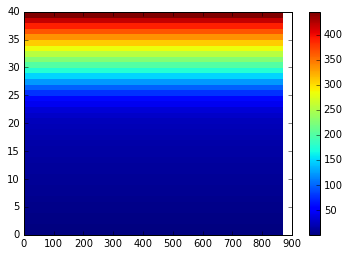

In [6]:
plt.pcolormesh(p[0,:,0,:])
plt.colorbar()

In [7]:
sal_ref = gsw_calls.generic_gsw_caller('mw_gsw_SR_from_SP.m', [sal[:],])

mw_gsw_SR_from_SP('output_file','input0.txt');exit


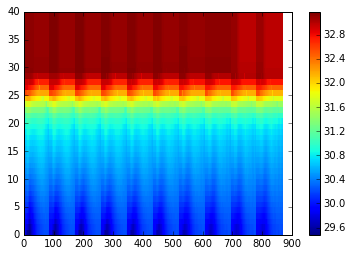

In [8]:
plt.pcolormesh(sal_ref[0,:,0,:])
plt.colorbar()

In [9]:
temp_cons = gsw_calls.generic_gsw_caller('mw_gsw_CT_from_pt.m', [sal_ref[:], temp[:],])

mw_gsw_CT_from_pt('output_file','input0.txt','input1.txt');exit


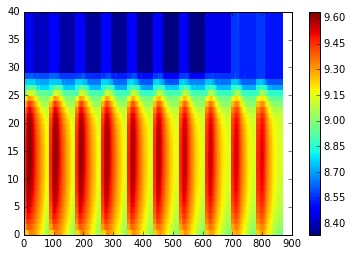

In [10]:
plt.pcolormesh(temp_cons[0,:,0,:])
plt.colorbar()

## What wrappers exist?

In [11]:
!ls /data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC/*.m

/data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC/get_tides.m
/data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC/mw_gsw_CT_from_pt.m
/data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC/mw_gsw_CT_from_t.m
/data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC/mw_gsw_p_from_z.m
/data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC/mw_gsw_SA_from_SP.m
/data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC/mw_gsw_SR_from_SP.m
/data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC/startup.m


## Checking on the inputs for a wrapper

In [12]:
!cat /data/nsoontie/MEOPAR/tools/I_ForcingFiles/OBC/mw_gsw_SA_from_SP.m

function [] = mw_gsw_SA_from_SP(filename, SPfile, pfile, longfile, latfile)
  startup()
  SP = dlmread(SPfile, ',');
  p = dlmread(pfile, ',');
  long = dlmread(longfile, ',');
  lat = dlmread(latfile, ',');
y = gsw_SA_from_SP(SP, p, long, lat);
  dlmwrite(filename, y, ',')


In [13]:
sal_abs = gsw_calls.generic_gsw_caller('mw_gsw_SA_from_SP.m', [sal[:], p[:], long[:], lat[:]])

mw_gsw_SA_from_SP('output_file','input0.txt','input1.txt','input2.txt','input3.txt');exit


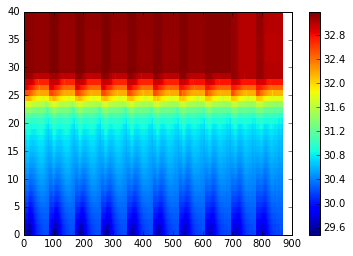

In [14]:
plt.pcolormesh(sal_abs[0,:,0,:])
plt.colorbar()

In [15]:
!ls *.txt

Output_derived.txt  Output.txt


In [16]:
!ls *.m

ls: cannot access *.m: No such file or directory
